# State sponsored Cyber Incidents

Analyze the state sponsored Cyber Incidents. Data provided by 
https://www.cfr.org/interactive/cyber-operations

In [17]:
import piplite
await piplite.install('squarify')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import squarify
from io import StringIO
from pyodide import open_url
#import matplotlib
%matplotlib inline

In [10]:
url = 'https://www.cfr.org/interactive/cyber-operations/export-incidents?_format=csv'
resp = await fetch(url)
r = open_url(url)
incidents = pd.read_csv( r , parse_dates=['Date'] )
incidents[incidents['Date'].dt.year == 2019]

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
274,Targeting of enterprise VPN servers from Forti...,2019-09-05,"Believed to be the work of APT 5, also known a...",Multiple threat actors targeted secure sockets...,NaN,NaN,China,NaN,Private sector,NaN,NaN,NaN
275,Bypassing of two-factor authentication,2019-12-19,APT 20,A China-aligned attacker bypassed virtual priv...,NaN,Governments and managed service providers in t...,China,Espionage,"Government, Private sector",https://resources.fox-it.com/rs/170-CAK-271/im...,https://www.zdnet.com/article/chinese-hacker-g...,NaN
276,Compromise of Amnesty International Hong Kong,2019-04-15,APTs associated with Beijing,This threat actor compromised Amnesty Internat...,NaN,Amnesty International Hong Kong,China,Espionage,Civil society,https://www.amnesty.org/en/latest/news/2019/04...,NaN,NaN
277,Targeting of Avast,2019-10-21,Government of China,China-aligned hackers breached Czech-based Ava...,NaN,Avast,China,Espionage,Private sector,https://www.reuters.com/article/us-avast-cyber...,https://www.zdnet.com/article/avast-says-hacke...,NaN
278,DarkUniverse,2019-11-05,NaN,DarkUniverse was a threat group affiliated wit...,NaN,NaN,Russian Federation,NaN,"Private sector, Military",https://securelist.com/darkuniverse-the-myster...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
343,Attack on forum of Hong Kong protesters,2019-12-04,Chinese government,China’s government used its “Great Cannon” dis...,NaN,Hong Kong protesters,China,Denial of service,"Civil society, Private sector",https://www.zdnet.com/article/china-resurrects...,https://cybersecurity.att.com/blogs/labs-resea...,NaN
344,Chinese intelligence repurposed NSA tools to a...,2019-05-06,APT 3,The threat actor repurposed hacking tools used...,NaN,"Belgium, Luxembourg, The Philippines, and Vietnam",China,Espionage,Private sector,https://www.symantec.com/blogs/threat-intellig...,NaN,NaN
345,Targeting of European and North American aeros...,2019-10-14,Believed to be the work of Turbine Panda,A threat actor conducted a multiyear espionage...,NaN,NaN,China,Espionage,Private sector,https://www.crowdstrike.com/blog/huge-fan-of-y...,https://www.csoonline.com/article/3445230/chin...,NaN
346,Hijacking of Iranian hacking infrastructure,2019-10-21,Turla,The Russian threat actor Turla took over an Ir...,NaN,"Military, government, scientific organizations...",Russian Federation,Espionage,"Military, Government, Civil society",https://www.ft.com/content/b947b46a-f342-11e9-...,https://www.reuters.com/article/us-russia-cybe...,https://www.bbc.com/news/technology-50103378


## Distribution
What types of attacks prevail

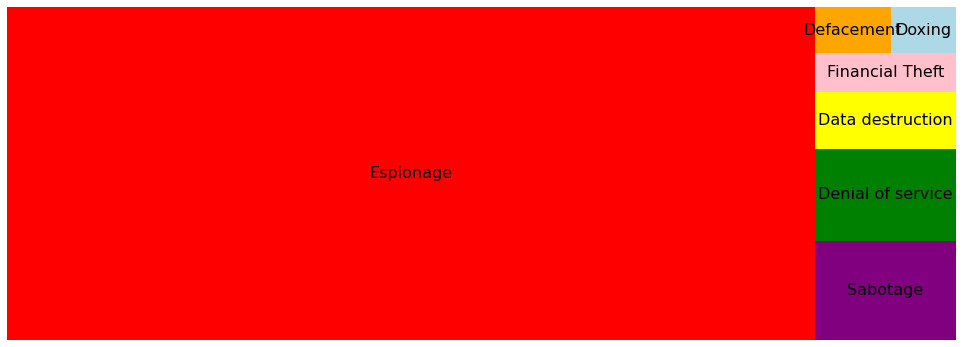

In [18]:
col = 'Type'
# Map values to colors:
c = dict( zip( [ "Data destruction", "Defacement", "Denial of service", "Doxing", "Sabotage", "Espionage", "Financial Theft" ],  [ 'yellow', 'orange', 'green', 'lightblue',  'purple','red', 'pink' ] ) )

x = incidents.groupby(col).size().reset_index()
x.columns = [col,'Numbers']
x = x.sort_values("Numbers", ascending=False)
#display( x )
w = 17
#fig, ax = plt.subplots(figsize=(w,w/1.61803398875))
fig, ax = plt.subplots(figsize=(w,w/25*9))
x['color'] = x[col].apply(lambda z: c[z])
squarify.plot(
    sizes=x['Numbers'],
    label=x.apply(lambda x: x[col], axis=1),
    color=x.color,
    text_kwargs={'fontsize':16}
)
ax = plt.axis('off')


## How many operations are observed over the years?

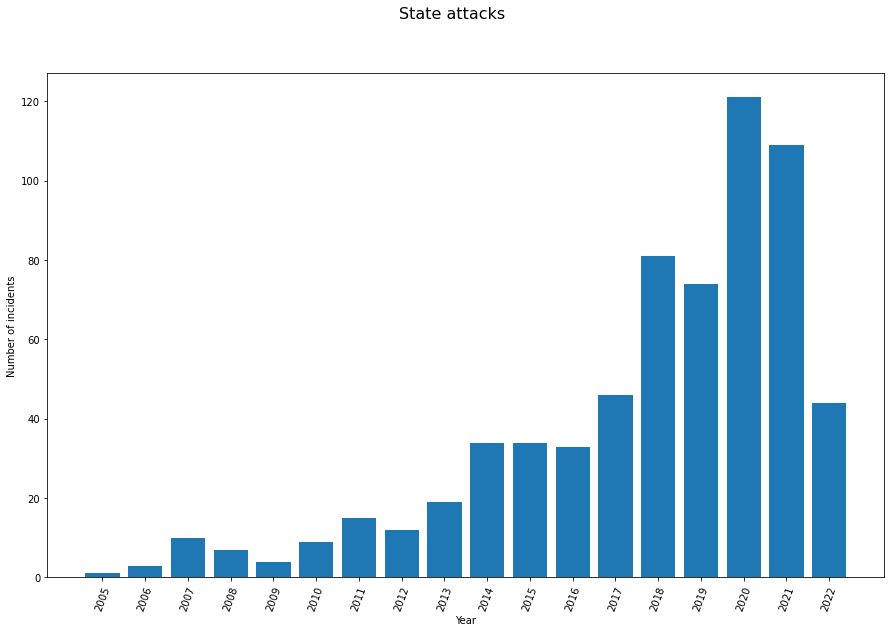

In [20]:
year = 2022
w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))
a = incidents[(~incidents['Date'].isnull()) & ( incidents['Date'].dt.year <= year )]
x = range(2005,year+1) 
ax.bar( x, list(a.groupby( incidents['Date'].dt.year ).size()) )
plt.xticks(rotation=70)
ax.set_xticks(x)
fig.suptitle('State attacks', fontsize=16)
ax.set_xlabel('Year')
_ = ax.set_ylabel('Number of incidents')

## How many are espionage?

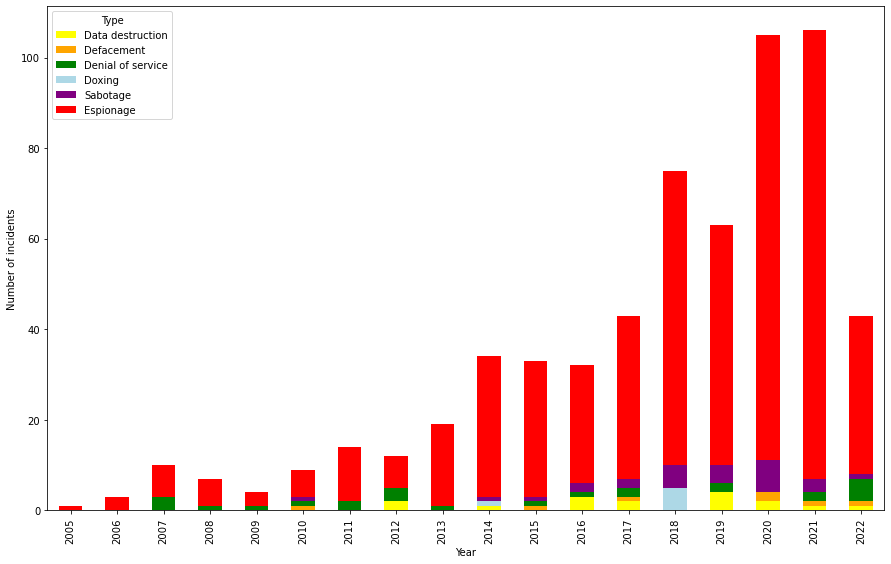

In [21]:
w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))
# https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
x = incidents[ (~incidents['Date'].isnull()) & ( incidents['Date'].dt.year <= year )][['Date','Type']]
x['Year'] = x['Date'].dt.year
y=x.groupby(['Year','Type']).size().unstack().fillna(0)
c = [ 'yellow', 'orange', 'green', 'lightblue',  'purple','red' ]
y = y[[ "Data destruction", "Defacement", "Denial of service", "Doxing", "Sabotage", "Espionage" ]]
ax.set_ylabel('Number of incidents')
_ = y.plot(kind='bar', stacked=True, ax=ax, color=c)

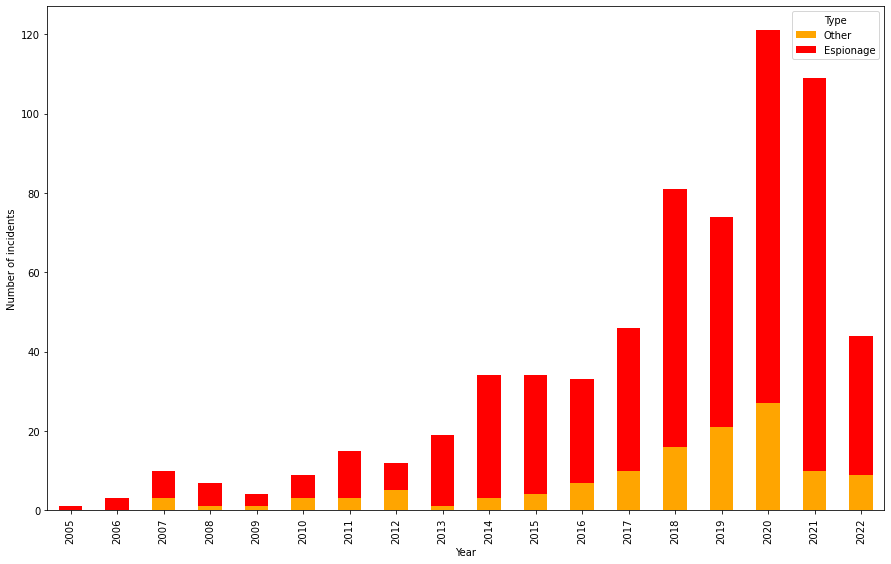

In [23]:
w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))

x = incidents[(~incidents['Date'].isnull()) & ( incidents['Date'].dt.year <=year )].reindex()
x['Year'] = x['Date'].dt.year
x.loc[x['Type']!= 'Espionage','Type'] = 'Other'
y=x.groupby(['Year','Type']).size().unstack().fillna(0)
y = y[[ "Other", "Espionage" ]]
ax.set_ylabel('Number of incidents')
_ = y.plot(kind='bar', stacked=True, ax=ax, color=[ 'orange', 'red' ])


## Who are the attackers

In [74]:
import json
r = open_url( 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/slim-2/slim-2.json' )
cntry_map  = { x['name']: x['alpha-2'] for x in json.load(r) }
cntry_map['United States'] =  'US'
cntry_map['Vietnam'] = 'VN'
cntry_map['Korea (Republic of)'] = 'KR'
cntry_map['Korea (Republic of)'] = 'KR'
cntry_map['Palestine'] = 'PS'
cntry_map['Taiwan'] = 'TW'
cntry_map['The Philippines'] = 'PH'
cntry_map['United Kingdom'] = 'UK'

In [75]:
#set( incidents['Main Sponsor'].unique() ).difference( set( cntry_map.keys() ) )

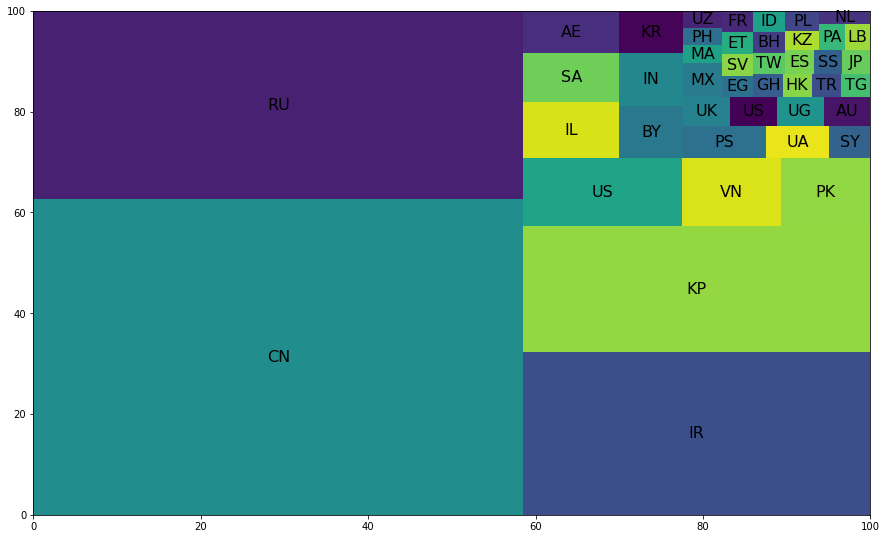

In [76]:
#incidents['Sponsor'].value_counts().plot(kind='pie')
col = 'Main Sponsor'
incidents['Main Sponsor'] = incidents['Sponsor'].str.split(",", n = 1, expand = True)[0]
x = incidents.groupby(col).size().reset_index()
x.columns = [col,'Numbers']
x = x.sort_values("Numbers", ascending=False)
#display( x )
w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))
#norm = matplotlib.colors.Normalize(vmin=x['Numbers'].min(), vmax=x['Numbers'].max())
#x['color'] = x['Numbers'].apply(lambda x: plt.cm.Greens(norm(x)))


_ =squarify.plot(
    sizes=x['Numbers'],
    label=x.apply(lambda x: cntry_map[x[col]] , axis=1),
    #color=x.color,
    text_kwargs={'fontsize':16}
)


## Who are victims

findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


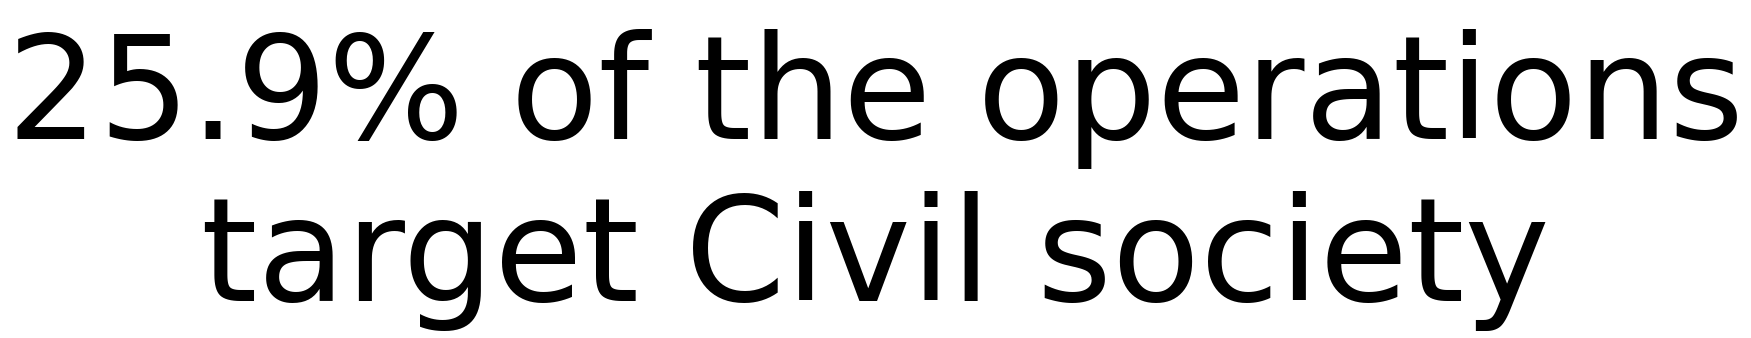

In [26]:
cs = len( incidents[(~incidents['Category'].isnull()) & (incidents['Category'].str.contains('Civil society'))])
tl = len( incidents )
100 * cs / tl
w = 15
fig, ax = plt.subplots(figsize=(w,1))
ax = plt.axis('off')
_ = plt.text(0.55, 0.6, "{r:2.1f}% of the operations\ntarget Civil society".format(r=100 * cs / tl), size=144,
         ha="center", va="top",
         fontname='Arial Black'
         )
 